# Predicting Financial Market Dislocations with Causal-Inference and Anomaly Detection: A Quantamental Approach
<br />


## Motivation
<br />

Funds that fail to beat their benchmarks quickly go extinct. Generating alpha is an extraordinarily difficult task. One that is becoming increasingly difficult, a reality illustrated by deteriorating hedge fund returns. **Find alpha or die** is the stark new reality for every portfolio manager. At the same time, we are living through a technology driven data explosion. In the world’s 2.5 billion gigabytes of data, Wall Street sees its savior. The prevailing belief is that this data — and the predictive power it promises — is the most powerful alpha source to emerge in the last quarter century. The $3 trillion hedge fund industry is currently
betting its future on it. This sentiment is especially true as markets enter a period of unprecedented volatility and uncertainty as the world grapples with the fallout of the pandemic, growing social and financial inequality, and now widespread civil unrest. A market once thought "wacky" has tipped into full-blown madness as the world seemingly unravels before our eyes. To this end, I am proposing a quantamental approach to help us navigate current and future crises. 

<br />

To be clear: models are not magic, they have their limitations and are only as good as their assumptions and the quality of the data they ingest. Every model, regardless of complexity, should under-go sufficient levels of scrutiny. Models may appear predictive when they are not and can lose predictive power as market conditions change. It is therefore in the firm's best interest for us to reserve belief in the model until it passes the appropriate checks-and-balances. In the remaining sections of this notebook, I do my best to take this "black box" and make it as transparent as possible without losing the forest for the trees (pun intended).

<br />

With oceans of information, and only so much time to investigate fundamentals before pulling the trigger on an investment decision, where we look for opportunities and risk is of critical importance. It is becoming increasingly easy to lose the forest through the trees, especially on particularly demanding days. Running a lean shop has its disadvantages and this is one of them. While for the foreseeable future, machines are unlikely to master the fundamentals, they are particularly good at sifting through large amounts of data and finding patterns otherwise invisible to the analyst. Models can provide clues the analyst can not see and the analyst can provide intuition and expertise the models can not comprehend. The idea is this: build a model that detects anomalous movements in pairwise correlations of market indices that most often precede market dislocations. The anomalies offer an executable signal that is ultimately at the discretion of individual desks to further investigate and act upon. In the following sections of this notebook, I walk the reader through the model, the assumptions I make, the promising preliminary results I obtain, and the conclusions I make.

<br />

## Market Sociology
<br />

Suppose we survey every investor on the planet. Assuming everyone has access to the same N pieces of information, we could ask: given the nth piece, are you a bear or a bull? Market behavior is often considered to reflect external economic news, though empirical evidence has challenged this connection [1,2]. Indeed, it is ultimately the investor's internal outlook and biases that determine how they answer the question. They can imagine a threat when there is none and ignore one when there is. What is more, investors can and often will, ignore accumulating evidence of an economic crisis — until they don't — and panic.

<br />

> *In sociology [3–5], panic has been defined as a collective flight from a real or imagined threat. In economics, bank runs occur at least in part because of the risk to the individual from the bank run itself—and may be triggered by predisposing conditions, external (perhaps catastrophic) events, or even randomly [6, 7]. Although empirical studies of panic are difficult, efforts to distinguish endogenously (self-generated) and exogenous (externally-generated) market panics from oscillations of market indices have met with some success [8–10], though the conclusions have been debated [11–14]. The literature generally uses the volatility and the correlation between asset prices to characterize risk [15–19]. These measures are sensitive to the magnitude of price movement and therefore increase dramatically when there is a market crash.* - [D. Harmon, M. Aguiar, D. Chinellato, Predicting Economic Market Crises using Measures of Collective Panic, ArXiv (2011)](https://arxiv.org/pdf/1102.2620.pdf)

<br />

This proposal is not radically different from what has been achieved in the literature. By making precise measurements of correlations between asset prices and the volatility of those correlations, we can nowcast a more complete picture of the market and look for early warning signals of extreme volatility and market dislocations. The reality of this approach is that correlations are non-stationary (they are notoriously unstable) and are known to harbor non-linear effects [20]. As such, instead of using Pearson's correlation, I use Székely's correlation, which measures both linear and non-linear associations in the data.

1. [D. Cutler, J. Poterba, and L. Summers, What Moves Stock Prices? Journal of Portfolio Managment, 15, 4 (1989).]( https://dspace.mit.edu/bitstream/handle/1721.1/64351/whatmovesstockpr00cutl.pdf?sequence=1&isAllowed=y)
2. [D. Harmon, M. Aguiar, D. Chinellato, Predicting Economic Market Crises using Measures of Collective Panic, ArXiv (2011)](https://arxiv.org/pdf/1102.2620.pdf)
3. [E. L. Quarantelli, The Sociology of Panic, in International Encyclopedia of the Social and Behavioral Sciences, N. J. Smelser and P. B. Baltes, Eds., (Elsevier, 2001)](http://www.csap.cam.ac.uk/media/uploads/files/1/mawson-2005-emotional-attachments.pdf)
4. [N. J. Smelser, Theory of Collective Behavior. (Free Press, Glencoe, Ill., 1963)](https://www.researchgate.net/publication/257770268_Looking_at_Smelser's_Theory_of_Collective_Behavior_After_Almost_50_Years_A_Review_and_Appreciation)
5. [A. Mawson, Understanding Mass Panic and Other Collective Responses to Threat and Disaster, Psychology, Medicine, Psychiatry (2005)](https://www.semanticscholar.org/paper/Understanding-Mass-Panic-and-Other-Collective-to-Mawson/c4df2c5209a8772b17f4652dc6518627c2465649)
6. [D.W. Diamond, P.H. Dybvig, Fed. Res. Bank. Minn. Quart. Rev. 24, 14 (2000).](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.25.9916&rep=rep1&type=pdf)
7. [C. W. Calomiris, G. Gorton, in Financial Markets and Financial Crises R. G. Hubbard, Ed. (National Bureau of Economic Research, 1990), chap. 4.](https://www.nber.org/books/glen91-1)
8. [J. K. Galbraith, The Great Crash 1929 (Houghton Mifflin, New York, 1954).](https://scholarlycommons.law.case.edu/cgi/viewcontent.cgi?referer=https://www.google.com/&httpsredir=1&article=3598&context=caselrev)
9. [C. Kindleberger, Manias, panics, and crashes (John Wiley & Sons Inc., New York, 1978).](http://vvernon.sunyempirefaculty.net/newperspectives/wp-content/uploads/2015/08/ManiasPanicsandCrashes.pdf)
10. [D. Sornette, A. Johansen, J.-P. Bouchaud, Journal of Physics I (France) 6, 167 (1996).](https://arxiv.org/pdf/cond-mat/9510036.pdf)
11. [J. A. Feigenbaum, P.G.O. Freund, Int. J. Mod. Phys. B 10, 3737 (1996).](https://arxiv.org/pdf/cond-mat/9509033.pdf)
12. [D. Sornette, A. Johansen, Physica A 245, 411 (1997).](https://arxiv.org/pdf/cond-mat/9704127;)

# Constructing a Time Series of Asset Correlation Networks

A simple mathematical representation of a collection of financial assets is a weighted [graph](ipedia.org/wiki/Graph_(discrete_mathematics)) (otherwise known as a network). Intutively, a graph captures the relations between objects -- abstract or concrete. Formally, a weighted graph is an ordered tuple $G = (V, E, W)$ where $V$ is a set of *verticies* (or nodes), $E$ is the set of pairwise relationships between the vertices (the *edges*), and $W$ is a set of numerical values assigned to each edge.

<br />

![](https://upload.wikimedia.org/wikipedia/commons/9/9a/Weighted_network.png)
<center>A weighted graph with ten vertices and twelve edges.</center>

<br />

A useful representation of $G$ is the *adjacency matrix*:
<center>$$
A_{ij} = \begin{cases} 
      1, & \text{if} \ i \ \text{is adjacent to} \ j \  \\
      0, & \text{otherwise}
   \end{cases}
$$</center>

<br />

Here the pairwise relations are expressed as the $ij$ entries of an $N \times N$ matrix, where $N$ is the number of nodes (assets). In what follows, the adjacency matrix becomes a critical instrument of our anomaly detection algorithm. **The strategy is to transform the time-dependent feature vectors (e.g., the daily opening, closing, high, and low prices) into a time series of graphs, with edges weighted by the daily correlations between each pair of feature vectors.** This method is closely related to a time-varying version of the work presented by [Tse, *et al*. (2010)](http://cktse.eie.polyu.edu.hk/pdf-paper/JoEF-1009.pdf). (See [Stock Correlation Network](https://en.wikipedia.org/wiki/Stock_correlation_network) for a summary.)  Once the data is in this form, we apply [graph centrality measures](https://towardsdatascience.com/graph-analytics-introduction-and-concepts-of-centrality-8f5543b55de3), averaged over the entire graph, to obtain signals we test for predictive power, and use as the basis of our anomaly detection algorithm.

<br />

## What on Earth is Székely's correlation?

Put simply, [Székely's correlation](https://en.wikipedia.org/wiki/Distance_correlation#cite_note-SR2007-2) is a generalization of Pearson's correlation insofar as it (1) detects both linear and non-linear associations in the data and (2) can be applied to time series of unequal dimension. Below is a comparison of Székely's and Pearson's correlation.

<br/><br/>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/400px-Correlation_examples2.svg.png)
<center>Pearson's correlation coefficients of sample data</center>

<br/><br/>
![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Distance_Correlation_Examples.svg/400px-Distance_Correlation_Examples.svg.png)
<center>Székely's correlation coefficients of sample data</center>

<br />

Székely's correlation varies between 0 and 1. A Székely's correlation close to 0 indicates a pair of time series is **independent** where values close to 1 indicate a high degree of **dependence**. This is in contrast to Pearson's correlation, which varies between -1 and 1, and can be 0 for dependent time series (see [Szekely, *et al*. (2017)](https://arxiv.org/pdf/0803.4101.pdf)). What makes Székely's correlation particularly appealing is the fact that it can be applied to time series of unequal dimension. This property allows us to compute the correlation between feature vectors with missing data.

<br />

### Mathematical Details
For the mathematically inclined reader, I give a brief overview of the derivation of Székely's correlation. Let $(X_{k}, Y_{k})$, &thinsp; $k = 1,2, ... , n$ be a statistical sampling of a pair of real-valued or vector-valued random variables. First, compute the $n \times n$ distance matrices 

\begin{equation}
A_{j,k} = ||X_{j} - X_{k}||, \ \ j,k=1,2,...,n
\end{equation}

\begin{equation}
B_{j,k} = ||Y_{j} - Y_{k}||, \ \ j,k=1,2,...,n
\end{equation}

<br />
where ||.|| denotes the Euclidean norm. Then take the $n \times n$ centering matrix

\begin{equation}
C_{n} = I_{n} - \dfrac{1}{n}\mathbb{O}
\end{equation}

<br />
where $I_{n}$ is the identity matrix and $\mathbb{O}$ is an $n \times n$ matrix of all 1's, and doubly center both distance matrices:

\begin{equation}
\bar{A} = C_{n}AC_{n}
\end{equation}

\begin{equation}
\bar{B} = C_{n}BC_{n}
\end{equation}

<br />
Both the row and column means of $\bar{A}$ and $\bar{B}$ are now equal to zero. The sample distance covariance is the square root of the arithmetic average of the products of $\bar{A}$ and $\bar{B}$
<br/><br/>

\begin{equation}
\text{dCov}_{n}(X, Y) = \dfrac{1}{n}\sqrt{\sum_{j=1}^{n}\sum_{k=1}^{n}A_{j,k}B_{j,k}}
\end{equation}

<br/><br/>
The sample distance variance is a special case of the sample distance covariance when both variables are equal,
<br/><br/>

\begin{equation}
\text{dVar}_{n}(X) := \text{dCov}_{n}(X,X) = \dfrac{1}{n}\sqrt{\sum_{k,l}A^{2}_{k,l}}
\end{equation}

Finally, Székely's correlation (a.k.a the Distance correlation) is 
<br/><br/>
\begin{equation}
\text{dCor}(X,Y) = \dfrac{\text{dCov}(X,Y)}{\sqrt{\text{dVar}(X)\text{dVar}(Y)}}
\end{equation}

<br/><br/>
### Notes

* Distance correlation requires the computation of all pairwise distances and therefore has an $\mathcal{O}(n^{2})$ time-complexity. Since we aren't high-frequency traders and won't be working with intraday datasets, the time-complexity won't be an issue in most cases. However, when working with very large indices e.g., the Nasdaq (3,000 companies), we will need a significant amount of compute. I wouldn't recommend computing Distance correlation for indices with more than a thousand assets with a CPU. If nessecary, we can explore modifying the code to run on a GPU.
<br/><br/>
* It is worth mentioning the standard risk measures using correlation, variance, and covariance (e.g., Sharpe ratio, Sortino ratio, Alpha, Beta, etc..) can be replaced with their *distance* generalizations. (Recall $\text{Var}(X) = \sigma^{2}$ for a random variable $X$.) The non-linear generalizations of these risk-adjusted measures should give a more accurate account of fund performance, and potentially improve models with these features.

In [17]:
import sys
import os
import datetime
from IPython.core.display import display, HTML

import math
import pandas as pd
import numpy as np
import networkx as nx
from statsmodels.tsa.stattools import grangercausalitytests, coint, adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from matplotlib import gridspec
from pylab import rcParams
import seaborn as sns
from jupyterthemes import jtplot

# import custom library tools
from hedgepy.core import build_series, build_network_time_series
from hedgepy.utils import write_series, read_series, read_data
from hedgepy.centrality import global_degree_centrality, global_eigencentrality

# enable importing external modules
sys.path.append(sys.path[0] + "/..")

# autoreload magic
%load_ext autoreload
%autoreload 2

display(HTML("<style>.container { width:70% !important; }</style>"))
jtplot.style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Prep and Model Initialziation
<br/><br/>
For the experiments conducted in this notebook, we will be exploring the Dow (DJA) index (as of April 2020) from May 2000 to May 2020. The data was retrieved from the Alpha Vantage API. The data is of high quality without any significant outliers. However, Verizon (V) and the Dow (DOW) had an unsually large number of missing values and were subsequently dropped from the analysis. In the first part

In [3]:
df_dja = pd.read_csv('../experiments/data/interim/DJA-2000-2020-clean.csv')
df_dja['date'] = pd.to_datetime(df_dja['date'])
df_dja.set_index('date', inplace=True)
df_dja = df_dja.drop('Unnamed: 0', axis=1)
df_dja.head()

,open,high,low,close,name
date,,,,,
2000-05-11,101.37,104.25,99.00,102.81,AAPL
2000-05-12,106.00,110.50,104.77,107.62,AAPL
2000-05-15,108.06,108.06,100.12,101.00,AAPL
2000-05-16,104.52,109.06,102.75,105.69,AAPL
2000-05-17,103.62,103.69,100.37,101.37,AAPL


In [10]:
df_dja.describe()

,open,high,low,close
count,140919.000000,140919.000000,140919.000000,140919.000000
mean,76.191848,76.928816,75.434800,76.199805
std,58.784718,59.297011,58.234603,58.778177
min,8.450000,9.210000,8.120000,8.600000
25%,39.950000,40.400000,39.430050,39.950000
50%,60.890000,61.490000,60.250000,60.890000
75%,92.750000,93.579950,91.900000,92.780000
max,702.410000,705.070000,699.570000,702.100000


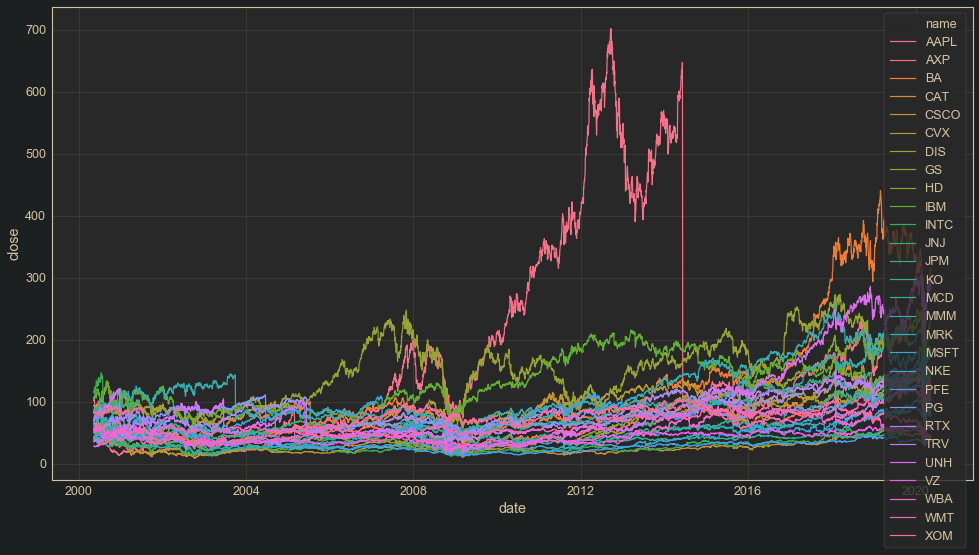

In [18]:
dja = df_dja.copy()
dja['date'] = dja.index
rcParams['figure.figsize'] = 16.5, 8.7
sns.lineplot(x='date', y='close', hue='name', data=dja)

In [6]:
# most of the data is missing for Verizon (V) and the Dow so I drop them.
df_dja = df_dja[(df_dja['name'] != 'V') & (df_dja['name'] != 'DOW')]

In [8]:
dja_series = read_series('DJA-2000-2020-rolling-90d-dcor.json')
dja_series.pop(pd.Timestamp('2000-09-18 00:00:00'));

nx_ts_hard = build_network_time_series(dja_series, soft_threshold=False)